# Markov Switching Dynamic Regression Model

## Importing the necessary libraries and modules

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
plt.rcParams['figure.figsize']=10,5
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_excel("bond_stock_data.xlsx",sheet_name=0)

In [54]:
#Examine the first few columns
df.head()

,Months,10YBond Returns,Stock Returns,Monetary Policy Rate,Inflation Rate,Exchange Rate
0,2015-01-01,0.153,0.00001,0.11,165.766401,66.466240
1,2015-02-28,0.159,0.01830,0.11,166.901129,76.353096
2,2015-03-31,0.161,0.05450,0.11,168.419862,73.372332
3,2015-04-30,0.144,0.09330,0.11,169.708184,73.047738
4,2015-05-31,0.140,-0.01150,0.11,171.577356,73.208693


In [55]:
#Check the columns
df.columns

Index(['Months', '10YBond Returns', 'Stock Returns', 'Monetary Policy Rate',
       'Inflation Rate', 'Exchange Rate'],
      dtype='object')

In [56]:
#Examine the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Months                60 non-null     datetime64[ns]
 1   10YBond Returns       60 non-null     float64       
 2   Stock Returns         60 non-null     float64       
 3   Monetary Policy Rate  60 non-null     float64       
 4   Inflation Rate        60 non-null     float64       
 5   Exchange Rate         60 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.9 KB


In [57]:
#Ensure the Month column is indeed in  datetime format
df['Months']=pd.to_datetime(df['Months'])

In [58]:
#Examine the data again
df.head()

,Months,10YBond Returns,Stock Returns,Monetary Policy Rate,Inflation Rate,Exchange Rate
0,2015-01-01,0.153,0.00001,0.11,165.766401,66.466240
1,2015-02-28,0.159,0.01830,0.11,166.901129,76.353096
2,2015-03-31,0.161,0.05450,0.11,168.419862,73.372332
3,2015-04-30,0.144,0.09330,0.11,169.708184,73.047738
4,2015-05-31,0.140,-0.01150,0.11,171.577356,73.208693


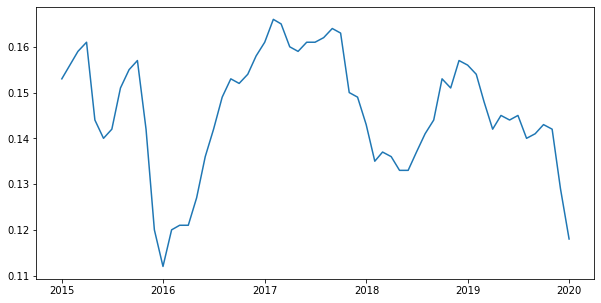

In [59]:
#Plotting the stock 10YBond Returns value to see the trends
plt.plot('Months','10YBond Returns',data=df);

## Estimating the  model with 2 regimes

In [60]:
exog = pd.concat((df["Stock Returns"],df["Monetary Policy Rate"],df["Inflation Rate"],df["Exchange Rate"]), axis=1)


In [61]:
# Fit the model
#exog=df["Stock Returns","Monetary Policy Rate","Inflation Rate","Exchange Rate"]
df_model = sm.tsa.MarkovRegression(df['10YBond Returns'], k_regimes=2,exog=exog1)
result = df_model.fit()

In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:        10YBond Returns   No. Observations:                   60
Model:               MarkovRegression   Log Likelihood                 186.305
Date:                Sun, 03 Jan 2021   AIC                           -346.610
Time:                        06:56:17   BIC                           -319.384
Sample:                             0   HQIC                          -335.961
                                 - 60                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.000     -6.146      0.000      -0.004      -0.002
x1            -0.0497     0.0001   -497.244      0.000      -0.050      -0.050
x2             0.5097   6.12e-05   8322.582      0.000       0.510       0.510
x3            -0.0001      0.139     -0.001      0.999      -0.272       0.272
x4             0.0012      0.027      0.044      0.965      -0.052       0.055
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1324      0.016      8.172      0.000       0.101       0.164
x1             0.0017      0.024      0.071      0.944      -0.046       0.049
x2            -0.2795      0.170     -1.641      0.101      -0.613       0.054
x3         -5.468e-05   4.07e-05     -1.344      0.179      -0.000    2.51e-05
x4             0.0007      0.000      4.961      0.000       0.000       0.001
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   2.15e-05      5.477      0.000    7.55e-05       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     1.219e-10      0.000   3.62e-07      1.000      -0.001       0.001
p[1->0]     2.201e-20        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+23. Standard errors may be unstable.
"""

## Estimating the model for 3 regimes

In [67]:
# Fit the model
#exog=df["Stock Returns","Monetary Policy Rate","Inflation Rate","Exchange Rate"]
df_model2 = sm.tsa.MarkovRegression(df['10YBond Returns'], k_regimes=3,exog=exog1)
result2 = df_model.fit()

In [68]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:        10YBond Returns   No. Observations:                   60
Model:               MarkovRegression   Log Likelihood                 186.305
Date:                Sun, 03 Jan 2021   AIC                           -328.610
Time:                        07:02:58   BIC                           -282.535
Sample:                             0   HQIC                          -310.588
                                 - 60                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.018     -1.269      0.204      -0.058       0.012
x1            -0.0485      0.001    -72.203      0.000      -0.050      -0.047
x2             0.2901      0.003     97.994      0.000       0.284       0.296
x3            -0.0001      4.134   -3.5e-05      1.000      -8.103       8.103
x4             0.0020      2.298      0.001      0.999      -4.502       4.506
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0298     53.772      0.001      1.000    -105.362     105.422
x1            -0.0526      7.264     -0.007      0.994     -14.290      14.185
x2             0.5023      1.746      0.288      0.774      -2.920       3.925
x3         -7.165e-05      0.875  -8.19e-05      1.000      -1.716       1.716
x4             0.0006      2.705      0.000      1.000      -5.302       5.303
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1324      0.016      8.172      0.000       0.101       0.164
x1             0.0017      0.024      0.071      0.944      -0.046       0.049
x2            -0.2795      0.170     -1.641      0.101      -0.613       0.054
x3         -5.468e-05   4.07e-05     -1.344      0.179      -0.000    2.51e-05
x4             0.0007      0.000      4.961      0.000       0.000       0.001
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   2.15e-05      5.477      0.000    7.55e-05       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]      3.83e-20      0.028   1.38e-18      1.000      -0.054       0.054
p[1->0]     5.976e-18        nan        nan        nan         nan         nan
p[2->0]     1.631e-17        nan        nan        nan         nan         nan
p[0->1]        0.9895      0.135      7.305      0.000       0.724       1.255
p[1->1]     1.044e-05     45.739   2.28e-07      1.000     -89.646      89.646
p[

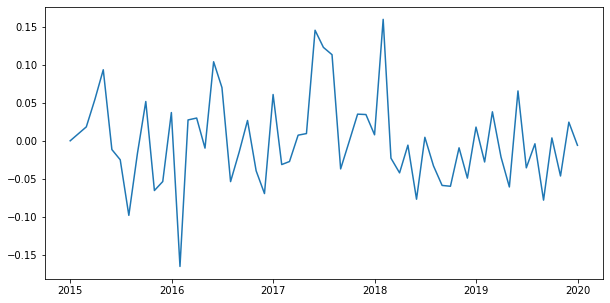

In [49]:
#Plotting the Stock Returns values to see the trends
plt.plot('Months','Stock Returns',data=df);

In [22]:
## Descriptive statistics of the data
df.describe()

,10YBond Returns,Stock Returns,Monetary Policy Rate,Inflation Rate,Exchange Rate
count,60.000000,60.000000,60.00000,60.000000,60.000000
mean,0.145617,0.000142,0.13300,231.947597,84.771377
std,0.013192,0.059974,0.01176,43.422691,12.276301
min,0.112000,-0.165000,0.11000,165.766401,62.154535
25%,0.139250,-0.037525,0.13500,192.229193,73.331423
50%,0.145000,-0.005800,0.14000,235.595284,86.935094
75%,0.156250,0.031050,0.14000,268.906596,93.995561
max,0.166000,0.159500,0.14000,307.473107,107.348376


In [23]:
## Correlation matrix of the data
df.corr()

,10YBond Returns,Stock Returns,Monetary Policy Rate,Inflation Rate,Exchange Rate
10YBond Returns,1.000000,0.145354,0.068170,-0.033807,0.465805
Stock Returns,0.145354,1.000000,0.029720,-0.074271,0.190054
Monetary Policy Rate,0.068170,0.029720,1.000000,0.584491,0.609954
Inflation Rate,-0.033807,-0.074271,0.584491,1.000000,0.422335
Exchange Rate,0.465805,0.190054,0.609954,0.422335,1.000000


## Smoothed probablity for 2 regimes

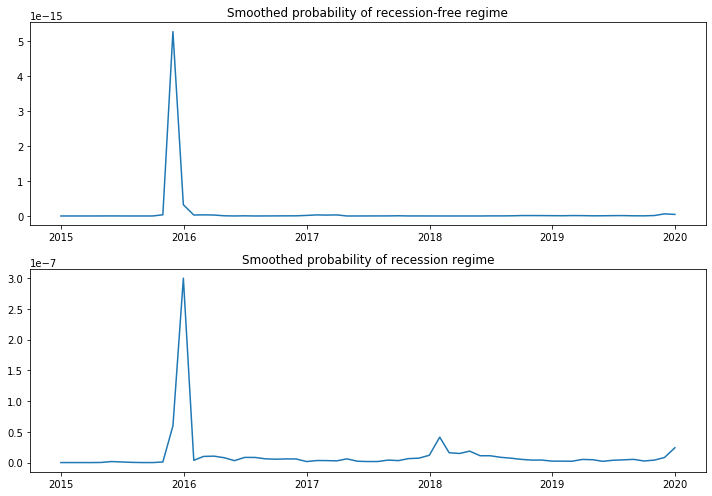

In [51]:
fig, axes = plt.subplots(2, figsize=(10,7))

ax = axes[0]
ax.plot(df["Months"],result.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of recession-free regime')

ax = axes[1]
ax.plot(df["Months"],result.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of recession regime')

fig.tight_layout()

## Smoothed probability  for 3 regimes

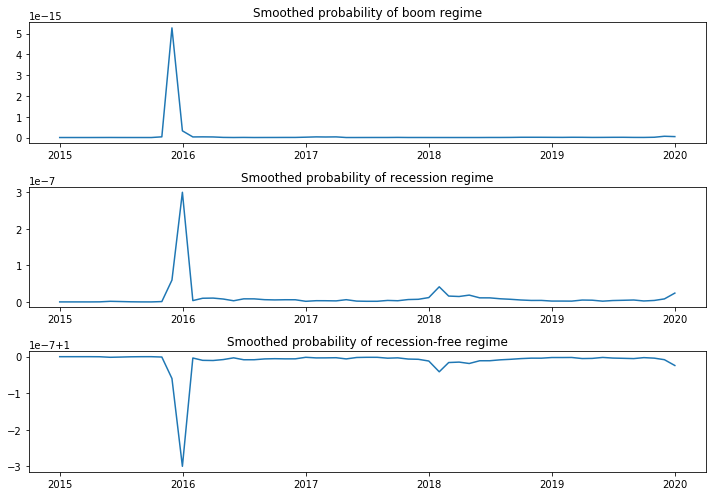

In [70]:
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(df["Months"],result2.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of boom regime')

ax = axes[1]
ax.plot(df["Months"],result2.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of recession regime')

ax = axes[2]
ax.plot(df["Months"],result2.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of recession-free regime')

fig.tight_layout()